## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [300]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from scipy.stats import mode
from scipy.stats.stats import pearsonr
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\586673006.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [301]:
data = pd.read_csv('train_kaggle.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [302]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [303]:
data = data.drop('Id', axis=1)

Столбец 'Id' дублирует информацию.

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [304]:
data.isnull().any().any()

True

In [305]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [306]:
print("Количество признаков с пропусками:", len(nulls))

Количество признаков с пропусками: 19


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [307]:
for col in data:
    if data[col].isnull().sum() > 0:
        print(col, ":", data[col].dtypes)

LotFrontage : float64
Alley : object
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinType2 : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object
PoolQC : object
Fence : object
MiscFeature : object


In [308]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

Для столбцов 'LotFrontage' и 'GarageYrBlt' пропуски заполняются средним значением, поскольку у данного признака не должно быть сильных выбросов (можно обойтись без медианы). Так же количество пустых ячеек заметно ниже, чем количество обьектов.

In [309]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(mode(data['MasVnrArea'])[0][0])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\306500169.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  data['MasVnrArea'] = data['MasVnrArea'].fillna(mode(data['MasVnrArea'])[0][0])


В столбце 'MasVnrArea' практически нет пропусков, поэтому вместо них подойдет значение моды.

In [310]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [311]:
percent = len(data[data['Alley'] == 'Grvl']) / (data.shape[0] - nulls['Alley'])

data['Alley'] = data['Alley'].fillna('Grvl', limit = int(percent * nulls['Alley']))
data['Alley'] = data['Alley'].fillna('Pave')


Поскольку в столбце 'Alley' большая часть строк с пропусками, нельзя заполнить их самым популярным значением. Так как признак бинарный, то количество для каждого значения определялось исходя из того, какой процент в заполненных строках приходится на величину (те заполнение с сохранением распределение признака). 

In [312]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [313]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [314]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [315]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [316]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [317]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [318]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [319]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [320]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [321]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [322]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [323]:
columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in columns:
    data[col] = data[col].fillna(mode(data[col])[0][0])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\3858968641.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  data[col] = data[col].fillna(mode(data[col])[0][0])
C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\3858968641.py:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  data[col] = data[col].fillna(mode(data[col])[0][0])


В столбцах 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish','GarageQual', 'GarageCond' количество пропусков сравнительно небольшое и присутсвует сильно доминирующее значение, поэтому пропсуки заполняются модой.

In [324]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [325]:
percent = len(data[data['FireplaceQu'] == 'Gd']) / (data.shape[0] - nulls['FireplaceQu'] )

data['FireplaceQu'] = data['FireplaceQu'].fillna('Gd', limit = int(percent * nulls['FireplaceQu']))
data['FireplaceQu'] = data['FireplaceQu'].fillna('TA')

Поскольку в стольце 'FireplaceQu' есть два доминирующих значения, а количество пропусков сильно велико, необходимо распределить пропуски между ними.

In [326]:
data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [327]:
percent = len(data[data['PoolQC'] == 'Gd']) / (data.shape[0] - nulls['PoolQC'])
percent_2 = len(data[data['PoolQC'] == 'Ex']) / (data.shape[0] - nulls['PoolQC'])

data['PoolQC'] = data['PoolQC'].fillna('Gd', limit = int(percent * nulls['PoolQC']))
data['PoolQC'] = data['PoolQC'].fillna('Ex', limit = int(percent_2 * nulls['PoolQC']))
data['PoolQC'] = data['PoolQC'].fillna('Fa')

In [328]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [329]:
percent = len(data[data['Fence'] == 'MnPrv']) / (data.shape[0] - nulls['Fence'])
percent_2 = len(data[data['Fence'] == 'GdPrv']) / (data.shape[0] - nulls['Fence'])
percent_3 = len(data[data['Fence'] == 'GdWo']) / (data.shape[0] - nulls['Fence'])

data['Fence'] = data['Fence'].fillna('MnPrv', limit = int(percent * nulls['Fence']))
data['Fence'] = data['Fence'].fillna('GdPrv', limit = int(percent_2 * nulls['Fence']))
data['Fence'] = data['Fence'].fillna('GdWo', limit = int(percent_3 * nulls['Fence']))
data['Fence'] = data['Fence'].fillna('MnWw')

In [330]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [331]:
percent = len(data[data['MiscFeature'] == 'Shed']) / (data.shape[0] - nulls['MiscFeature'])
percent_2 = len(data[data['MiscFeature'] == 'Gar2']) / (data.shape[0] - nulls['MiscFeature'])
percent_3 = len(data[data['MiscFeature'] == 'Othr']) / (data.shape[0] - nulls['MiscFeature'])

data['MiscFeature'] = data['MiscFeature'].fillna('Shed', limit = int(percent * nulls['MiscFeature']))
data['MiscFeature'] = data['MiscFeature'].fillna('Gar2', limit = int(percent_2 * nulls['MiscFeature']))
data['MiscFeature'] = data['MiscFeature'].fillna('Othr', limit = int(percent_3 * nulls['MiscFeature']))
data['MiscFeature'] = data['MiscFeature'].fillna('TenC')

В столбцах 'PoolQC', 'Fence', 'MiscFeature' большое количество пропусков относительно количества обьектов, также нет сильно доминирующего значения, поэтому пропуски распределяются между всеми соответствующе.

✅ Проверьте, что вы действительно избавились от пропусков

In [332]:
data.isnull().any().any()

False

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [333]:
X_int = data.select_dtypes(exclude='object')

In [334]:
X_obj = data.select_dtypes('object')
X_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [335]:
data.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [336]:
column = []

for col in X_obj:
    if X_obj[col].nunique() <= 5:
        column.append(col)

In [337]:
print(column)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']


In [338]:
data = pd.get_dummies(data, columns=column, drop_first=True)

In [339]:
col_label = []
for col in X_obj:
    if col not in column:
        data[col] = LabelEncoder().fit_transform(data[col])
        col_label.append(col)

In [340]:
print(col_label)

['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']


Для признаков, которые имеют меньше 5 уникальных значений, используется One Hot encoder. Для значения 5 и выше LabelEncoder. Это сделано для того, чтобы избежать появления сильно большого датафрейма из-за признаков, которые имеют много уникальных значений.

✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [341]:
X_int.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [342]:
correlations = {}
columns = X_int.columns.tolist()

In [343]:
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(X_int.loc[:, col_a], X_int.loc[:, col_b])

In [344]:
result = X_int.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p_value']

print(result.sort_index())

                                 PCC       p_value
1stFlrSF__2ndFlrSF         -0.202646  5.379083e-15
1stFlrSF__3SsnPorch         0.056104  3.206515e-02
1stFlrSF__BedroomAbvGr      0.127401  1.041034e-06
1stFlrSF__BsmtFullBath      0.244671  2.414777e-21
1stFlrSF__BsmtHalfBath      0.001956  9.404841e-01
...                              ...           ...
YearRemodAdd__TotRmsAbvGrd  0.191740  1.482154e-13
YearRemodAdd__TotalBsmtSF   0.291066  6.698407e-30
YearRemodAdd__WoodDeckSF    0.205726  2.036344e-15
YearRemodAdd__YrSold        0.035743  1.722487e-01
YrSold__SalePrice          -0.028923  2.694132e-01

[666 rows x 2 columns]


In [345]:
data_corr = result[np.abs(result['PCC']) > 0.7]
data_corr

,PCC,p_value
OverallQual__SalePrice,0.790982,2.185675e-313
YearBuilt__GarageYrBlt,0.780555,8.104209e-300
TotalBsmtSF__1stFlrSF,0.819530,0.000000e+00
GrLivArea__TotRmsAbvGrd,0.825489,0.000000e+00
GrLivArea__SalePrice,0.708624,4.518034e-223
GarageCars__GarageArea,0.882475,0.000000e+00


Целевая переменная (цена на дом) имеет сильную корреляцию с двумя признаками: 'OverallQual' - материалы дома; 'GrLivArea' - жилая площадь.

<AxesSubplot: >

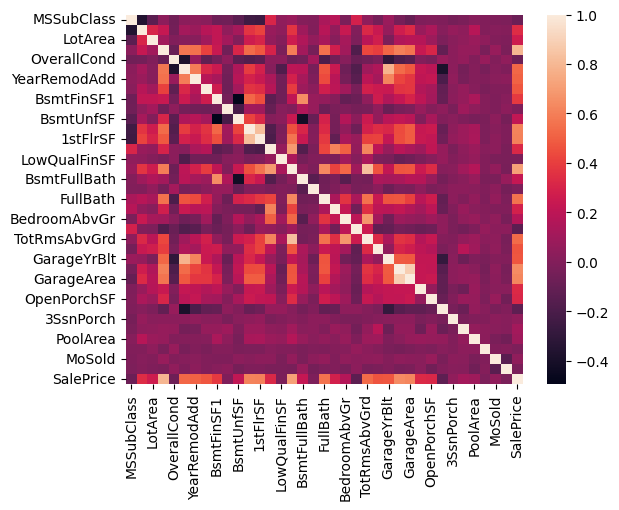

In [346]:
sns.heatmap(X_int.corr(), annot=False)

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [347]:
datacr = X_int.corr()

In [348]:
datacr = datacr[datacr.index != 'SalePrice']

In [349]:
max = datacr['SalePrice'].abs().max()

In [350]:
min = datacr['SalePrice'].abs().min()

In [351]:
max_str = datacr.index[np.abs(datacr['SalePrice']) == max].tolist()

In [352]:
min_str = datacr.index[np.abs(datacr['SalePrice']) == min].tolist()

Text(0, 0.5, "['OverallQual']")

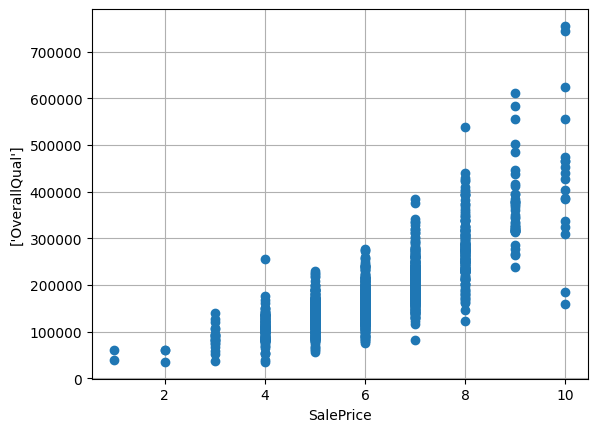

In [353]:
y=data['SalePrice']

fig,ax = plt.subplots()

x=data[max_str]

ax.plot(x, y, 'o')

ax.grid(True)

plt.xlabel("SalePrice")
plt.ylabel(max_str)

Text(0, 0.5, "['BsmtFinSF2']")

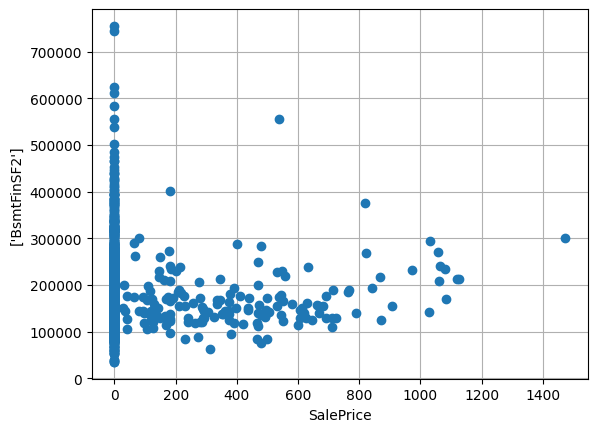

In [354]:
y=data['SalePrice']

fig,ax = plt.subplots()

x=data[min_str]

ax.plot(x, y, 'o')

ax.grid(True)

plt.xlabel("SalePrice")
plt.ylabel(min_str)

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

In [355]:
data['SalePrice'] = np.log1p(data['SalePrice'])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\3343273054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color = 'blue',


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

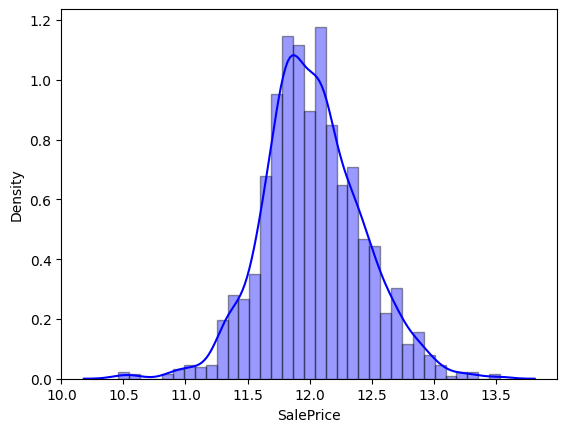

In [356]:
sns.distplot(data['SalePrice'], color = 'blue',
             hist_kws={'edgecolor':'black'})

Целевая переменнаая подчиняется закону нормального распределения. Со средним значением примерно 163_000

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [357]:
Y = data['SalePrice']

In [358]:
data.drop('SalePrice', axis=1, inplace=True)

In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.25, random_state=13)

In [360]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1095, 130), (1095,), (365, 130), (365,))

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

In [361]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

класс, используемый для масштабирования данных с помощью среднего и стандартного отклонения (x - mean)/var

In [362]:
lin_regr=LinearRegression()
lin_regr.fit(X_train,Y_train)

LinearRegression()

In [363]:
regr_MSE_train = mean_squared_error(Y_train, lin_regr.predict(X_train))
regr_MSE_test = mean_squared_error(Y_test, lin_regr.predict(X_test))
print(regr_MSE_train, regr_MSE_test)

0.010151493586226551 3.4633292221880284e+21


Модель переобучена. Решение: регуляризация (Лассо/Ридж), кросс-валидация.

In [364]:
regr_RMSE = np.sqrt(regr_MSE_train)
regr_MAE = mean_absolute_error(Y_train, lin_regr.predict(X_train))
regr_R2 = r2_score(Y_train, lin_regr.predict(X_train))

r2 - это коэффициент детерминации, который показывает какая доля дисперсии целевых значений объясняется моделью. Формула: 1-D(условная (по факторам x) дисперсия зависимой переменной)/D(выборки) или 1 - (сумма разностей целевой переменной и предсказанной моделью)/(сумма разностей целевой и среднего). 1 - очень хорошо подходит, 0 - можно было бы не использовать модель а заменить средним, <0 - модель не подходит. По своей сути он показывает то, насколько модель точно попала в значения относительно среднего значения.

In [365]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, Y_train)

Lasso(alpha=10)

In [367]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, Y_train)

Ridge(alpha=10)

In [369]:
lasso_cross = LassoCV(cv=5, alphas=np.arange (0.001, 1, 0.001), random_state=0).fit(X_train,Y_train)

ridge_cross = RidgeCV(cv=5, alphas=np.arange (0.001, 1, 0.001)).fit(X_train,Y_train)

In [370]:
value_lasso = lasso_cross.alpha_
value_ridge = ridge_cross.alpha_

In [372]:
lasso_new = linear_model.Lasso(alpha=value_lasso)
lasso_new.fit(X_train, Y_train)

Lasso(alpha=0.002)

In [374]:
ridge_new = linear_model.Ridge(alpha=value_ridge)
ridge_new.fit(X_train, Y_train)


Ridge(alpha=0.999)

In [375]:
#RMSE
lasso_new_RMSE = np.sqrt(mean_squared_error(Y_train, lasso_new.predict(X_train)))

ridge_new_RMSE = np.sqrt(mean_squared_error(Y_train, ridge_new.predict(X_train)))

print("RMSE:")
print(f"Линейная регрессия:{regr_RMSE}")
print(f"Лассо:{lasso_new_RMSE}")
print(f"Ридж:{ridge_new_RMSE}")

RMSE:
Линейная регрессия:0.10075462066935963
Лассо:0.10509351913124183
Ридж:0.10076281519145967


Наименьшая ошибка у метода Lasso регрессии (L1 регуляризация). Но значения отличаются слабо.

In [376]:
#MAE
lasso_new_MAE = mean_absolute_error(Y_train, lasso_new.predict(X_train))

ridge_new_MAE = mean_absolute_error(Y_train, ridge_new.predict(X_train))

print("MAE:")
print(f"Линейная регрессия:{regr_MAE}")
print(f"Лассо:{lasso_new_MAE}")
print(f"Ридж:{ridge_new_MAE}")

MAE:
Линейная регрессия:0.07393999872505813
Лассо:0.07590244586503632
Ридж:0.07391452941985342


Наименьшая ошибка у метода Ridge регрессии (L2 регуляризация). Но значения отличаются слабо.

In [377]:
#R2
lasso_new_R2 = r2_score(Y_train, lasso_new.predict(X_train))

ridge_new_R2 = r2_score(Y_train, ridge_new.predict(X_train))

print("R2:")
print(f"Линейная регрессия:{regr_R2}")
print(f"Лассо:{lasso_new_R2}")
print(f"Ридж:{ridge_new_R2}")

R2:
Линейная регрессия:0.935523198306966
Лассо:0.9298503656077144
Ридж:0.9355127098934537


Наиболие близкая к 1 обычная линейная регрессия.

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\950141487.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coef_regr['weights'], color = 'blue', kde=False,


Text(0.5, 1.0, 'Line_Regression')

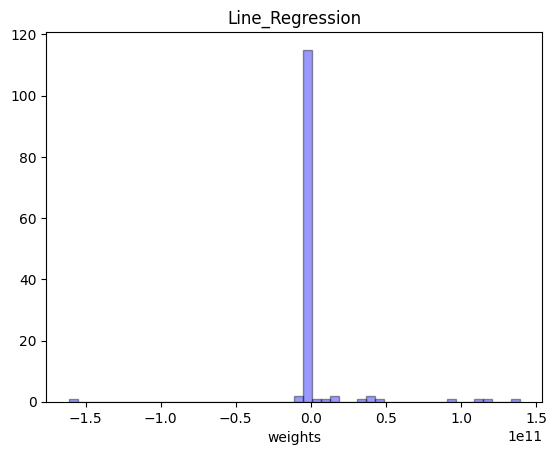

In [382]:
coef_regr = pd.DataFrame(lin_regr.coef_,index=data.columns, columns=['weights'])
sns.distplot(coef_regr['weights'], color = 'blue', kde=False,
             hist_kws={'edgecolor':'black'}).set_title('Line_Regression')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\3480640150.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coef_lasso['weight_lasso'], kde=False, color = 'r',


Text(0.5, 1.0, 'Lasso')

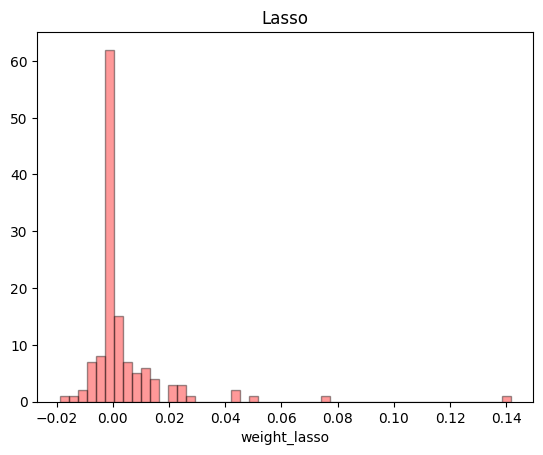

In [383]:
coef_lasso = pd.DataFrame(lasso_new.coef_,index=data.columns, columns=['weight_lasso'])
sns.distplot(coef_lasso['weight_lasso'], kde=False, color = 'r',
             hist_kws={'edgecolor':'black'}).set_title('Lasso')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17032\2459606548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coef_ridge['weight_ridge'], color = 'g',


Text(0.5, 1.0, 'Ridge')

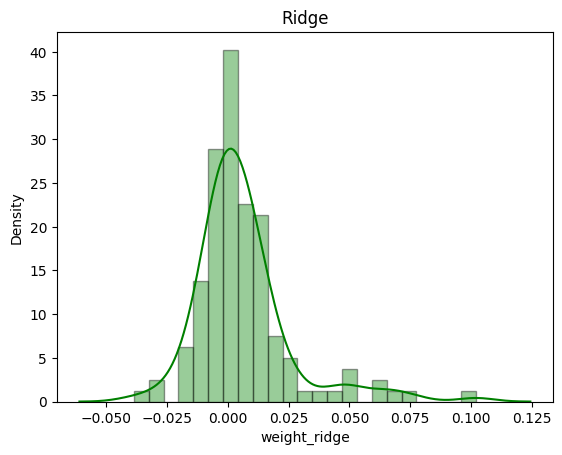

In [384]:
coef_ridge = pd.DataFrame(ridge_new.coef_,index=data.columns, columns=['weight_ridge'])
sns.distplot(coef_ridge['weight_ridge'], color = 'g',
             hist_kws={'edgecolor':'black'}).set_title('Ridge')

Модель оказалась переобучена, поскольку значение некоторых весов намного выше, чем у остальных. Но от этого удалось избавиться путем регуляризации.